### Discussion 5

### Image processing

In [1]:
# Automatically display matplotlib plots, so that we don't have to write `plt.show()`.
# Normally this should be in a cell at the top of the notebook.
%matplotlib inline

numpy.ndarray

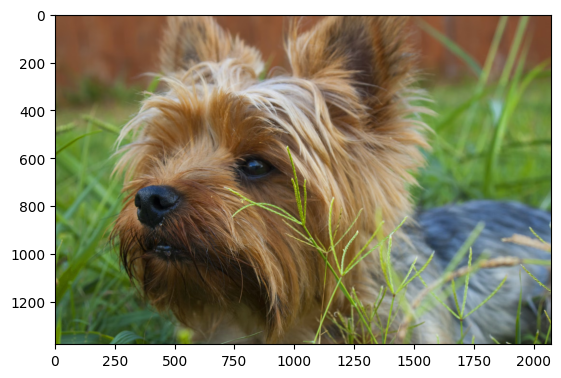

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as img

# Dog image from https://unsplash.com/photos/jx_kpR7cvDc
dog = img.imread("../images/dog.png")
plt.imshow(dog)

type(dog)

In [4]:
dog.shape

(1378, 2073, 3)

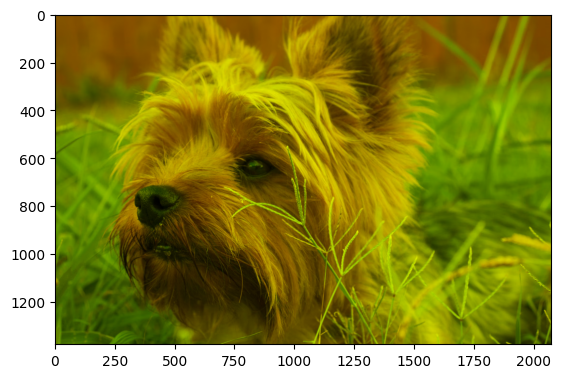

In [5]:
dog_rg = dog.copy()
dog_rg[:,:,2] = 0
plt.imshow(dog_rg)

Depending on which package you use to load an image, pixels may be encoded as integers or floating point (decimal) numbers. The scikit-image package has [some documentation](http://scikit-image.org/docs/dev/user_guide/data_types.html) about what these numbers typically mean.

In [6]:
dog.dtype

dtype('float32')

Let's try to find all the green pixels and make them red.

How can we do this?

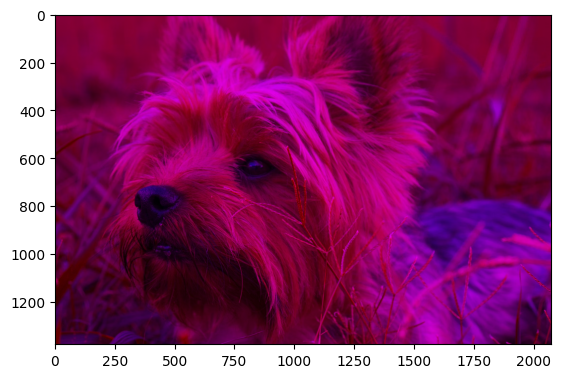

In [7]:
reddog_rgb = dog.copy()
#reddog_rgb[:, :, 0] = 1 # Set red channel to large value.
reddog_rgb[:, :, 1] = 0 # Set green channel to small value.
plt.imshow(reddog_rgb)

Break problems into small steps.

If you're trying to figure out how something works, test on small "toy" examples and draw pictures.

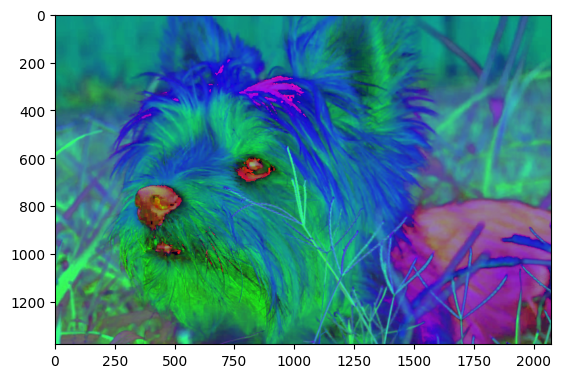

In [8]:
import numpy as np
import skimage as ski
import skimage.color

# Switch from (red, green, blue) to (hue, saturation, value).
# Hue is the color (from red to violet).
# Saturation is how colorful (from colorless to colorful).
# Value is how bright (from black to bright color).
dog_hsv = ski.color.rgb2hsv(dog)
plt.imshow(dog_hsv)

In [9]:
dog_hsv.shape

(1378, 2073, 3)

 Start by taking a small piece of the dog image, say the lower left corner.

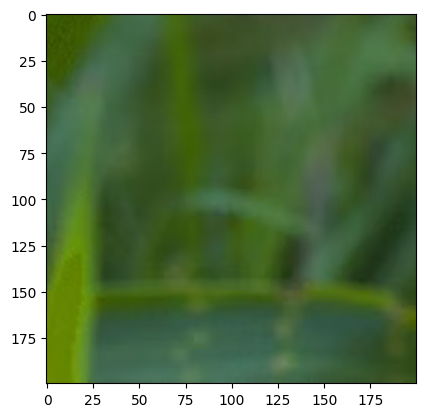

In [10]:
grass = dog_hsv[-200:, :200, :] #dog_hsv[266-50:266, 0:50, :]
plt.imshow(ski.color.hsv2rgb(grass))

How can we figure out what "green" looks like in HSV?

In [11]:
mu = grass.mean(axis = (0, 1))
mu

array([0.29303646, 0.5274062 , 0.38279298], dtype=float32)

We can preview this "green" by making a 2x2 swatch.

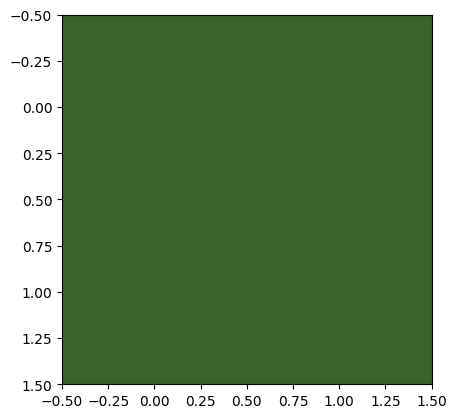

In [12]:
swatch = np.stack(4 * [mu]).reshape((2, 2, 3))
plt.imshow(ski.color.hsv2rgb(swatch))

Now we need to get all pixels with a hue "nearby" the grass mean.

How can we define "nearby"?

In [13]:
sd = grass.std(axis = (0, 1))
sd

array([0.05297463, 0.17469776, 0.0628553 ], dtype=float32)

In [14]:
tol = (mu[0] - 3 * sd[0], mu[0] + 3 * sd[0])
tol

(0.13411258161067963, 0.45196034014225006)

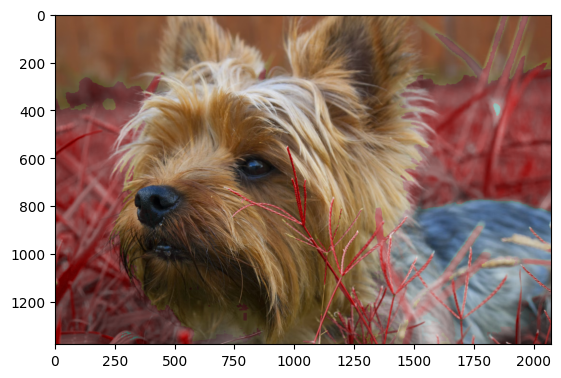

In [15]:
reddog = dog_hsv.copy()
is_green = (tol[0] <= reddog[:, :, 0]) & (reddog[:, :, 0] <= tol[1])
reddog[is_green, 0] = 0
plt.imshow(ski.color.hsv2rgb(reddog))

What would happen if we tried this with RGB instead of HSV?